# Load the data

In [1]:
# Linear Regression
import pandas as pd
def Read_data(df: pd.DataFrame)->float:
     
     """_summary_
        Load the 
        diamond data
     """
     
     try:
          data = pd.read_csv(df)
          return data
     
     except FileExistsError:
          raise FileExistsError("Error:")
     
     except Exception as e:
           print(f"Error: {e}")
           return None
      
data = Read_data(df = r'C:\Users\mk744\OneDrive - Poornima University\Desktop\Feature Scaling\Basic_statistics\diamond.csv')
data

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641
...,...,...,...,...,...,...
303,304,1.01,I,VS1,HRD,8175
304,305,1.02,F,VVS2,HRD,10796
305,306,1.06,H,VVS2,HRD,9890
306,307,1.02,H,VS2,HRD,8959


In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation

In [5]:
# isolate X and Y
y = data.price
X = data.carat

In [7]:
def Isolate_X_y(X):
     
     try:
          X = data.carat
          # y = data.price
          return X
     
     except Exception as e:
          raise KeyError(f"Error:")

x = Isolate_X_y(X)
x


0      0.30
1      0.30
2      0.30
3      0.30
4      0.31
       ... 
303    1.01
304    1.02
305    1.06
306    1.02
307    1.09
Name: carat, Length: 308, dtype: float64

In [8]:
def Isolate_X_y(y):
     
     try:
          # X = data.carat
          y = data.price
          return y
     
     except Exception as e:
          raise KeyError(f"Error:")

y = Isolate_X_y(y)
y

0       1302
1       1510
2       1510
3       1260
4       1641
       ...  
303     8175
304    10796
305     9890
306     8959
307     9107
Name: price, Length: 308, dtype: int64

In [9]:
# Adding Constant

def Adding_constant(X):
     
     """_summary_
        Add the 
        Constant.
        and this
        constant 
        is always 1.
     """
     
     try:
          X = sm.add_constant(X)
          return X
     except Exception as e:
          print(f"Error: {e}")
          
x = Adding_constant(X)
x.head()

,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


# Linear Regression

In [12]:
# Regression model

def Model_1(x, y):
     
     """_summary_
        Regression
        Model.
     """
     try:
          model_1 = sm.OLS(endog = y, exog = x).fit()
          return model_1.summary()
     
     except Exception as e:
          print(f"Error: {e}")

print("The OLS Model is given below: \n")        
print(Model_1(x, y))


The OLS Model is given below: 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          3.04e-150
Time:                        07:28:17   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.357

# Plotting the Regression Graph

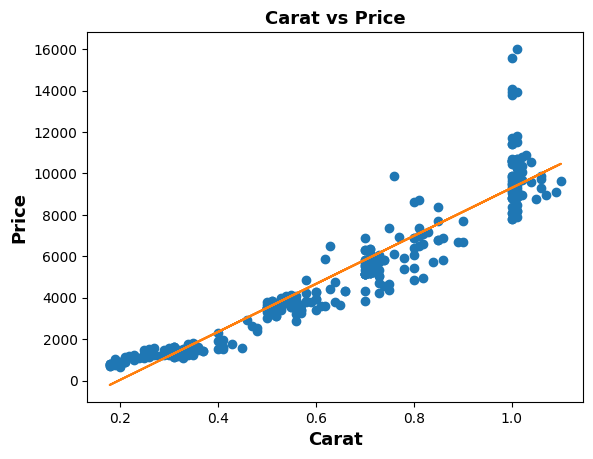

In [16]:
# plot the graph

def Visualization(x, y):
     
     """_summary_
        plot the graph.
     """
     
     try:
          x = data.carat
          plt.plot(x, y, 'o')
          b, a = np.polyfit(x, y, 1)
          plt.plot(x, b * x + a)
          plt.title("Carat vs Price", fontsize = 13, weight = 'bold')
          plt.xlabel('Carat', fontsize = 13, weight = 'bold')
          plt.ylabel('Price', fontsize = 13, weight = 'bold')
          plt.show()
          
     except Exception as e:
          print(f"Error: {e}")
          
Visualization(x, y)

# Linear Regression with dummy variable

In [19]:
# look at carat variable
# create binary variable

def Binary_Variable(data: pd.DataFrame):
     
     """_summary_
       create binary
       variable.
     """
     try:
          data['carat_binary'] = np.where(data.carat > 0.6, 1, 0)
          return data
     
     except Exception as e:
          print(f"Error: {e}")
          
binary_variable = Binary_Variable(data)
binary_variable

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0
...,...,...,...,...,...,...,...
303,304,1.01,I,VS1,HRD,8175,1
304,305,1.02,F,VVS2,HRD,10796,1
305,306,1.06,H,VVS2,HRD,9890,1
306,307,1.02,H,VS2,HRD,8959,1


# Plot with carat_banary with price

In [20]:
A = data.carat_binary
B = data.price


In [22]:
A = sm.add_constant(A)
A.head()

,const,carat_binary
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0


In [24]:
model_2 = sm.OLS(endog = B, exog = A).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           1.79e-73
Time:                        07:51:36   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

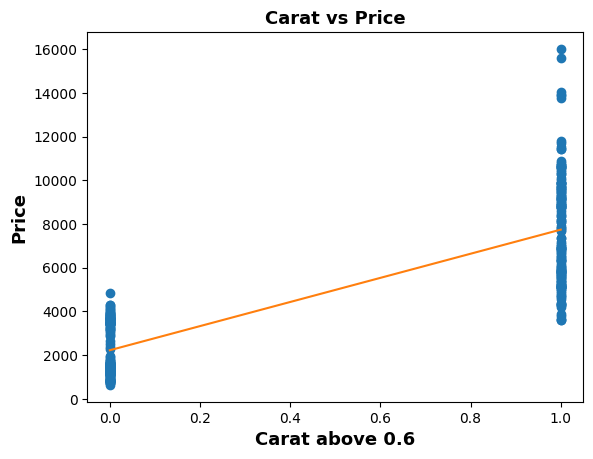

In [27]:
A = data.carat_binary
plt.plot(A, B, 'o')
b, a = np.polyfit(A, B, 1)
plt.plot(A, b * A + a)
plt.title("Carat vs Price", fontsize = 13, weight = 'bold')
plt.xlabel('Carat above 0.6', fontsize = 13, weight = 'bold')
plt.ylabel('Price', fontsize = 13, weight = 'bold')
plt.show()